<a href="https://colab.research.google.com/github/benjamin2jean/benjamin2jean/blob/main/CMSC421_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CMSC421 Group 15 Project - Evolving the perfect virus
Maxim Kapelina, Benjamin Jean, Joey Moore, Yann Leonardo, and Yonas Mekonnen

In [ ]:
# imports
import random as r
import numpy as np
import copy
import pylab as pl
import random
import matplotlib.pyplot as plt

In [ ]:
#Global Data Structures for Visualization Tracking
virus_strengths = []
fitness_scores = []
num_healthy = []
num_infected = []
num_dead = []


**Human Class**

In [ ]:
class Human:
  # Initialize a "human" to act as a member of the simulated population
  # id is a unique identifier
  # age is a value 1-80, should impact virus calculations
  # interaction rate is a value 0-10 representing the number of interactions this person has per day
  # immune_strength is a value 0-100 used to determine if the virus will infect this individual
  def __init__(self, id, age, interaction_rate, immune_strength):
    self.id = id
    self.age = age
    self.interaction_rate = interaction_rate
    self.immune_strength = immune_strength
    self.is_healthy = True
    self.is_alive = True
    self.days_infected = 0

  def make_patient_zero(self):
    self.is_healthy = False
    self.days_infected += 1
  
  def increase_days_infected(self):
    self.days_infected += 0 if self.is_healthy else 1
    return self.days_infected

  # returns true or false depending on if the virus will infect this human, also updates self.is_healthy
  # determined by comparing the virus's virulence score to the humans immune_strength score
  # NEEDS IMPROVEMENT
  def infect(self, virus):
    # Pseudocode (will need adjustment):
    # return true if virus.virulence > self.immune_strength and self.age > 10 and self.age < 50
    # elif self.age < 10 or self.age > 50:
      # return true if virus.virulence > self.immune_strength - self.age else false
    virulence = virus.getInfectionChance() * 100
    if virulence == 0:
      return False
    if self.immune_strength < virulence and self.age > 10 and self.age < 60:
      self.is_healthy = False
      return True
    elif (self.age < 10 or self.age > 60) and self.immune_strength - self.age < virulence:
      self.is_healthy = False
      return True
    return False

  # returns true if the virus successfully kills the individual. Also updates self.is_alive
  # determined by comparing the virus's fatality score to the humans immune_strength score adjusted for age
  # NEEDS IMPROVEMENT
  def kill(self, virus):
    # Pseudocode (will need adjustment):
    # return true if virus.fatality > self.immune_strength - (80 - self.age) and self.days_infected < 3 else false
    fatality = virus.getFatality() * 100
    if self.immune_strength - self.age < fatality and self.days_infected > 2:
      self.is_alive = False
      return True
    return False

**Simulation Class**

In [ ]:
# Simulation class
class PopSimulation:
  # Initializes the population simulation with a list of humans and a virus to test
  def __init__(self, num_humans, virus):
    self.num_humans = num_humans
    self.virus = virus
    self.population = []

    # Initialize and add num_humans amount of humans to the population
    for i in range(self.num_humans):
      id = i
      age = r.randint(1, 80) # Potential (Maybe the normal distrubtion is fine since most populations follow a normal distrubtion this may help: https://www.visualcapitalist.com/the-worlds-population-2020-by-age/)
      immune_strength = np.random.normal(50, 25, 1) # Potential change
      if immune_strength < 0:
        immune_strength = 0
      # Interaction rate determined based on age (values can be adjusted)
      # ages 1-10 or 60-80 interact with 2 people per day
      # ages 10-20 or 40-60 interact with 5 people per day
      # ages 20-40 interact with 8 people per day
      interaction_rate = 0
      if age < 10 or age > 60:
        interaction_rate += 2
      elif age < 20 or age > 40:
        interaction_rate += 5
      else:
        interaction_rate += 8

      human = Human(id, age, interaction_rate, immune_strength)
      self.population.append(human)

    self.patient_zero = r.choice(self.population).make_patient_zero()
  # Runs the simulation for num_days
  # Returns a list containing the number of remaining healthy, infected, and dead individuals respectively
  def run_simulation(self, num_days, is_quarantining=False):
    healthy = copy.deepcopy(self.population)
    infected = []
    p_zero_idx = [h.is_healthy for h in healthy].index(False)
    infected.append(healthy[p_zero_idx])
    del healthy[p_zero_idx]

    for day in range(num_days):
      # calculate infections (with each person having at most 1 interaction)
      not_interacted = [human.id for human in self.population]
      for h in self.population:
        if not h.is_healthy and h.id in not_interacted:
          not_interacted.remove(h.id)
          for i in range(h.interaction_rate):
            if len(not_interacted) > 0:
              interactee_id = r.choice(not_interacted)
              not_interacted.remove(interactee_id)
              interactee = self.population[[human.id for human in self.population].index(interactee_id)]
              # if a healthy person is infected, move them to the infected list
              if interactee.is_healthy and interactee.infect(self.virus):
                infected.append(interactee)
                h_idx = [human.id for human in healthy].index(interactee.id)
                del healthy[h_idx]
      # Calculate deaths
      for h in infected:
        interactee.increase_days_infected()
        if h.kill(self.virus):
          h_idx = [human.id for human in infected].index(h.id)
          del infected[h_idx]
      # Determine if anyone remains
      # if len(healthy) == 0:
      #   return [0, len(infected), self.num_humans - len(infected)]

    # return number of remaining healthy, infected, and dead individuals
    return [len(healthy), len(infected), self.num_humans - len(healthy) - len(infected)]


In [ ]:
# Testing the above block (currently not very valuable since infections and deaths have a 50% chance of occurring)
# virus = 0b1111100101
# built_virus = Virus(virus)
# fitness = 0
# num_runs = 10
# for i in range(num_runs):
#   run1 = PopSimulation(100, built_virus).run_simulation(100)
#   print(run1)

**Virus Class**

In [ ]:
# Virus class (Joey)
#We need to flesh out exactly what each bit is going to represent in the genome representation
#Need to assign each symptom a Fatality + infection score, as well as define the relationships between all 5

#might want to consider having deaths calculated first so the virus will be less likely to go for a super high fatality score. 

#If s1+s2+... is too high, return Fatality of 100% so it stops spreading very quickly

class Virus:
  #Numbers may be too symmetrical leading to no clear best genome, might need to tweak values later.
  #s1 is Coughing -- Low Fatality, High Infection -- 2%, 38%
  #s2 is Sneezing -- Low F, Very High I           -- 5%, 35%
  #s3 is Vomiting -- Mid F, Mid I                 -- 20%, 20%
  #s4 is Dizziness/Brain -- High F, Low I         -- 35%, 5%
  #s5 is Fever -- Very high F, Low I              -- 38%, 2%

  #defining maximum strength of a given virus' symptoms 111111111 = 15
  max_symptom_score = 10


  #Fatality Scores -- How likely the virus is to kill -- add up to .33
  s1_F = 0.0066
  s2_F = 0.0165
  s3_F = 0.066
  s4_F = 0.1155
  s5_F = 0.1254

  #Infection Scores -- How Easily the virus spreads -- add up to .33
  s1_I = 0.1254
  s2_I = 0.1155
  s3_I = 0.066
  s4_I = 0.0165
  s5_I = 0.0066

  def __init__(self, genome):
    self.genome = genome
    self.s1 = genome>>8
    self.s2 = (genome>>6) & 3
    self.s3 = (genome>>4) & 3
    self.s4 = (genome>>2) & 3
    self.s5 = genome & 3
    #Print Each Symptom's Strength
    print (f"Coughing: {self.s1} Sneezing: {self.s2} Vomiting: {self.s3} Dizziness: {self.s4} Fever: {self.s5}")
    #Total Symptom Strength
    print(f"Total Strength: {self.s1 + self.s2 + self.s3 + self.s4 + self.s5}")
    virus_strengths.append(self.s1 + self.s2 + self.s3 + self.s4 + self.s5)

  def showVirus(self):
    print (f"This virus represents the following symptoms: Coughing: {self.s1} Sneezing: {self.s2} Vomiting: {self.s3} Dizziness: {self.s4} Fever: {self.s5}")

  #feel free to use any of these functions as if they work properly while they get implemented.
  

  #returns a value 0-1
  def getFatality(self):
    #Return Fatality of all symptoms * Strength, with any relationships between symptoms considered.
    Fatality = (self.s1_F * self.s1) + (self.s2_F * self.s2) + (self.s3_F * self.s3) + (self.s4_F * self.s4) + (self.s5_F * self.s5) 

    if self.s1+self.s2+self.s3+self.s4+self.s5 > self.max_symptom_score:
      return 1
    else:
      return Fatality
    
  #returns a value 0-1
  def getInfectionChance(self):
    #Return infection chance of all symptoms * their strength, with any relationships between the symptoms considered.  
    Infection = (self.s1_I * self.s1) + (self.s2_I * self.s2) + (self.s3_I * self.s3) + (self.s4_I * self.s4) + (self.s5_I * self.s5) 

    if self.s1+self.s2+self.s3+self.s4+self.s5 > self.max_symptom_score:
      return 0
    else:
      return Infection


In [ ]:
# virus = 0b0110101011
# built_virus = Virus(virus)
# print(built_virus.getFatality())
# print(built_virus.getInfectionChance())


**Genetic Algorithm**

In [ ]:
# Genetic algorithm (yann, ben, yonas)

#Init function in order to initiate all the necessary variables that are going to be used during the process
#IDEA: We can save all the data in an output file
#Virus can be as following:0100101101 where each 2 bits is symptom strength, strength can be 0-3

class ga:

  def __init__(self,stringLength,popSize,numHumans, numDays, nGens,pm,pc):
        # nGens: int, 
        # probability mutation pm: float; probability crossover pc: float
        self.pm = pm                       # probability of mutation
        self.pc = pc                       # probability of crossover
        self.nGens = nGens                 # max num generations
        self.stringLength = stringLength   
        self.popSize = popSize
        self.numHumans = numHumans
        self.numDays = numDays
        self.pop = np.random.rand(self.popSize,self.stringLength)
        self.pop = np.where(self.pop<0.5,1,0)  # create initial pop
        fitness = self.fitFcn(self.pop)    # fitness values for initial population
        self.bestfit = fitness.max()       # fitness of (first) most fit chromosome
        self.bestloc = np.where(fitness == self.bestfit)[0][0]  # most fit chromosome locn
        self.bestchrome = self.pop[self.bestloc,:]              # most fit chromosome
        self.bestcall = self.bestchrome   # best chromosome all generations
        self.bestfall = self.bestfit      # and its fitness

  def fitFcn(self,pop):         # compute pop fitness 
     fitness = np.ones(self.popSize)      # initialize fitness values (1D array)
     for i in range(self.popSize):        # for each individual in the population
       fitness[i] = self.fitInd(pop[i])   #   compute its fitness
     return fitness
     

  def fitInd(self,chrome):      # compute and return fitness of a single chromosome
    #run the given virus 3 times, average the output values and apply fitness function to the result
    new_chrome=chrome[0],chrome[1],chrome[2],chrome[3],chrome[4],chrome[5],chrome[6],chrome[7],chrome[8],chrome[9] #Joining all the bits from the array to have a tuple variable
    i = ''.join(str(x) for x in new_chrome) #Passing from tuple into integer
    k = int(i)
    z = str(k)
    good_chrome=int(z,2)#The result of transforming the string of bits (z) into an integer in base 2
    built_virus = Virus(good_chrome)
    fitness=0
    run1 = PopSimulation(self.numHumans, built_virus).run_simulation(self.numDays)#You can revise it if you think that the fitness function and how it is called can be improved
    fitness = (-1 * run1[0]) + (0.5 * run1[1]) + (3 * run1[2])
    return fitness


#Tournament function in order to pick the best virus of each generation (the size of this tournament can be changed)
  def tournament(self,pop,fitness,popsize):  # fitness array, pop size
     # select first parent par1
     cand1 = np.random.randint(popsize)      # candidate 1, 1st tourn., int
     cand2 = cand1                           # candidate 2, 1st tourn., int
     while cand2 == cand1:                   # until cand2 differs
        cand2 = np.random.randint(popsize)   #   identify a second candidate
     if fitness[cand1] > fitness[cand2]:     # if cand1 more fit than cand2
        par1 = cand1                         #   then first parent is cand1
     else:                                   #   else first parent is cand2
        par1 = cand2
     # select second parent par2
     cand1 = np.random.randint(popsize)      # candidate 1, 2nd tourn., int
     cand2 = cand1                           # candidate 2, 2nd tourn., int
     while cand2 == cand1:                   # until cand2 differs
        cand2 = np.random.randint(popsize)   #   identify a second candidate
     if fitness[cand1] > fitness[cand2]:     # if cand1 more fit than cand2
        par2 = cand1                         #   then 2nd parent par2 is cand1
     else:                                   #   else 2nd parent par2 is cand2
        par2 = cand2
     return par1,par2


  def xover(self,child1,child2):    # single point crossover
        # cut locn to right of position (hence subtract 1)
        locn = np.random.randint(0,self.stringLength - 1)
        tmp = np.copy(child1)       # save child1 copy, then do crossover
        child1[locn+1:self.stringLength] = child2[locn+1:self.stringLength]
        child2[locn+1:self.stringLength] = tmp[locn+1:self.stringLength]
        return child1,child2

  def mutate(self,pop):            # bitwise point mutations
        whereMutate = np.random.rand(np.shape(pop)[0],np.shape(pop)[1])
        whereMutate = np.where(whereMutate < self.pm)
        pop[whereMutate] = 1 - pop[whereMutate]
        return pop

  def run_ga(self):
    for gen in range(self.nGens): # for each generation gen
           # Compute fitness of the pop
           fitness = self.fitFcn(self.pop)  # measure fitnesses 
           # initialize new population
           newPop = np.zeros((self.popSize,self.stringLength),dtype = 'int64')
           # create new population newPop via selection and crossovers with prob pc
           for pair in range(0,self.popSize,2):  # create popSize/2 pairs of offspring
               # tournament selection of two parent indices
               p1, p2 = self.tournament(self.pop,fitness,self.popSize)  # p1, p2 integers
               child1 = np.copy(self.pop[p1,:])       # child1 for newPop
               child2 = np.copy(self.pop[p2,:])       # child2 for newPop
               if np.random.rand() < self.pc:                 # with prob self.pc 
                  child1, child2 = self.xover(child1,child2)  #   do crossover
               newPop[pair,:] = child1                # add offspring to newPop
               newPop[pair + 1,:] = child2
           # mutations to population with probability pm
           newPop = self.mutate(newPop)
           self.pop = newPop                  # new population becomes current population
           fitness = self.fitFcn(self.pop)    # fitness values for new population
           self.bestfit = fitness.max()       # fitness of (first) most fit chromosome
           self.bestloc = np.where(fitness == self.bestfit)[0][0]  # most fit chromosome locn
           self.bestchrome = self.pop[self.bestloc,:]              # most fit chromosome

           new_chrome=self.bestchrome[0],self.bestchrome[1],self.bestchrome[2],self.bestchrome[3],self.bestchrome[4],self.bestchrome[5],self.bestchrome[6],self.bestchrome[7],self.bestchrome[8],self.bestchrome[9] #Joining all the bits from the array to have a tuple variable
           i = ''.join(str(x) for x in new_chrome) #Passing from tuple into integer
           k = int(i)
           z = str(k)
           good_chrome=int(z,2)#The result of transforming the string of bits (z) into an integer in base 2
           built_virus = Virus(good_chrome)
           run1 = PopSimulation(self.numHumans, built_virus).run_simulation(self.numDays)
           num_healthy.append(run1[0])
           num_infected.append(run1[1])
           num_dead.append(run1[2])
           fitness_scores.append(self.bestfit)


           if self.bestfit > self.bestfall:   # if current chromosome best seen so far
             self.bestcall = self.bestchrome  #   record the new best chromosome
             self.bestfall = self.bestfit     #   and its fitness 
    fitness = self.fitFcn(self.pop)         # compute final population fitnesses
    self.bestfit = fitness.max()            # fitness of (first) most fit chromosome
    self.bestloc = np.where(fitness == self.bestfit)[0][0]  # most fit chromosome locn
    self.bestchrome = self.pop[self.bestloc,:]              # most fit chromosome
    print("The best chromosome is", self.bestchrome)
    return self.bestchrome


In [ ]:
#Quick reset of Global Data Structures
virus_strengths = []
fitness_scores = []
num_healthy = []
num_infected = []
num_dead = []

In [ ]:
genetic_algorithm = ga(10,20,50,300,20,0.01,0.4)
best_chrome=genetic_algorithm.run_ga()

Coughing: 2 Sneezing: 1 Vomiting: 1 Dizziness: 2 Fever: 2
Total Strength: 8
Coughing: 0 Sneezing: 1 Vomiting: 3 Dizziness: 2 Fever: 0
Total Strength: 6
Coughing: 2 Sneezing: 3 Vomiting: 3 Dizziness: 1 Fever: 0
Total Strength: 9
Coughing: 2 Sneezing: 2 Vomiting: 1 Dizziness: 1 Fever: 1
Total Strength: 7
Coughing: 1 Sneezing: 2 Vomiting: 1 Dizziness: 2 Fever: 3
Total Strength: 9
Coughing: 3 Sneezing: 3 Vomiting: 2 Dizziness: 0 Fever: 1
Total Strength: 9
Coughing: 1 Sneezing: 2 Vomiting: 0 Dizziness: 0 Fever: 2
Total Strength: 5
Coughing: 3 Sneezing: 3 Vomiting: 0 Dizziness: 2 Fever: 3
Total Strength: 11
Coughing: 1 Sneezing: 3 Vomiting: 2 Dizziness: 3 Fever: 0
Total Strength: 9
Coughing: 1 Sneezing: 2 Vomiting: 3 Dizziness: 2 Fever: 3
Total Strength: 11
Coughing: 1 Sneezing: 1 Vomiting: 1 Dizziness: 3 Fever: 2
Total Strength: 8
Coughing: 3 Sneezing: 1 Vomiting: 0 Dizziness: 3 Fever: 3
Total Strength: 10
Coughing: 1 Sneezing: 3 Vomiting: 0 Dizziness: 3 Fever: 1
Total Strength: 8
Coughing:

**Visualization and final results**

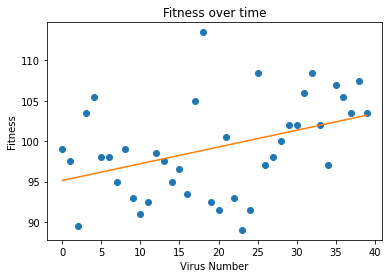

In [ ]:
# Visualization and final results
y = np.array(fitness_scores)
x = np.array(list(range(len(fitness_scores))))
m, b = np.polyfit(x, y, 1)
plt.plot(x,y, 'o')
plt.plot(x, m*x + b)
plt.xlabel("Virus Number")
plt.ylabel("Fitness")
plt.title("Fitness over time")
plt.show()

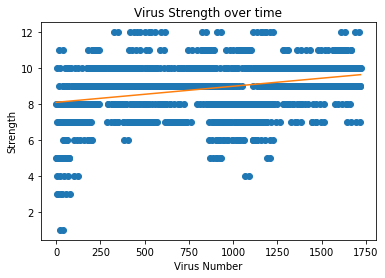

In [ ]:
y = np.array(virus_strengths)
x = np.array(list(range(len(virus_strengths))))
m, b = np.polyfit(x, y, 1)
plt.plot(x,y, 'o')
plt.plot(x, m*x + b)
plt.xlabel("Virus Number")
plt.ylabel("Strength")
plt.title("Virus Strength over time")
plt.show()

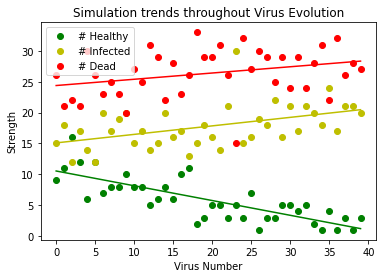

In [ ]:
y = np.array(num_healthy)
x = np.array(list(range(len(num_healthy))))
m, b = np.polyfit(x, y, 1)
plt.plot(x,y, 'o', label = "# Healthy", color = 'g')
plt.plot(x, m*x + b, color = 'g')

y = np.array(num_infected)
x = np.array(list(range(len(num_infected))))
m, b = np.polyfit(x, y, 1)
plt.plot(x,y, 'o', label = "# Infected", color = 'y')
plt.plot(x, m*x + b, color = 'y')

y = np.array(num_dead)
x = np.array(list(range(len(num_dead))))
m, b = np.polyfit(x, y, 1)
plt.plot(x,y, 'o', label = "# Dead", color = 'r')
plt.plot(x, m*x + b, color = 'r')

plt.legend()
plt.xlabel("Virus Number")
plt.ylabel("Strength")
plt.title("Simulation trends throughout Virus Evolution")
plt.show()